In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def calculate_metric(df, category, dataset_name):
    print(f"Processing {dataset_name}...")
    true_labels = df['1'].fillna('Unknown')
    pred_labels = df['# of Shots 8'].fillna('NA_placeholder')
    
    if category == 'I':
        # Use F1 score for category I
        precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
        return f1*100
    elif category == 'C':
        # Ordinal mapping for category C
        if dataset_name == 'FUSARIUM 22':
            ordinal_map = {
                'Highly Resistant': 1,
                'Resistant': 2,
                'Moderately Resistant': 3,
                'Susceptible': 4,
                'Highly Susceptible': 5,
            }
        elif dataset_name == 'Yellow Rust 19':
            ordinal_map = {
                'Resistant (R)': 1,
                'Moderately Resistant (MR)': 2,
                'MRMS': 3,
                'Moderately Susceptible (MS)': 4,
                'Susceptible (S)': 5,
                'No disease (0)': 0,
            }
        else:
            raise ValueError(f"Unknown dataset for category C: {dataset_name}")
        
        # Add unseen labels to the ordinal map with the worst score
        max_value = max(ordinal_map.values())
        all_labels = set(true_labels).union(set(pred_labels))
        for label in all_labels:
            if label not in ordinal_map:
                ordinal_map[label] = max_value + 1
        
        true_ordinal = true_labels.map(ordinal_map)
        pred_ordinal = pred_labels.map(ordinal_map)
        
        # Calculate mean absolute error
        mae = np.mean(np.abs(true_ordinal - pred_ordinal))
        
        return mae

# Define the datasets and their categories
datasets = {
    'Bean Leaf Lesions': 'I',
    'DeepWeeds': 'I',
    'Durum Wheat': 'I',
    'FUSARIUM 22': 'C',
    'IP02': 'I',
    'Mango Leaf Disease': 'I',
    'SBRD': 'I',
    'Soybean Seeds': 'I',
    'Yellow Rust 19': 'C'
}

# Get the list of model folders
model_folders = [f for f in os.listdir('results') if os.path.isdir(os.path.join('results', f))]

# Initialize results dictionary
results = {model: {} for model in model_folders}

# Process each dataset for each model
for model in model_folders:
    for dataset, category in datasets.items():
        try:
            df = pd.read_csv(f'results/{model}/{dataset}.csv', engine='python')
            metric = calculate_metric(df, category, dataset)
            results[model][dataset] = metric
        except FileNotFoundError:
            print(f"File not found: results/{model}/{dataset}.csv")
            results[model][dataset] = np.nan
        except Exception as e:
            print(f"Error processing {model}/{dataset}: {str(e)}")
            results[model][dataset] = np.nan

# Create the result table
result_table = pd.DataFrame(results).T  # Transpose to match the desired format

# Rename the index and columns
result_table.index.name = 'Model'
result_table.columns.name = 'Dataset'

# Round the results to 4 decimal places
result_table = result_table.round(2)

# Display the result table
print(result_table)

# Optionally, save the result table to a CSV file
result_table.to_csv('analysis/plain-results/result_table_shot_8.csv')

Processing Bean Leaf Lesions...
Processing DeepWeeds...
Processing Durum Wheat...
Processing FUSARIUM 22...
Processing IP02...
Processing Mango Leaf Disease...
Processing SBRD...
Processing Soybean Seeds...
Processing Yellow Rust 19...
Processing Bean Leaf Lesions...
Processing DeepWeeds...
Processing Durum Wheat...
Processing FUSARIUM 22...
Processing IP02...
Processing Mango Leaf Disease...
Processing SBRD...
Processing Soybean Seeds...
Processing Yellow Rust 19...
Processing Bean Leaf Lesions...
Processing DeepWeeds...
Processing Durum Wheat...
Processing FUSARIUM 22...
Processing IP02...
Processing Mango Leaf Disease...
Processing SBRD...
Processing Soybean Seeds...
Processing Yellow Rust 19...
Processing Bean Leaf Lesions...
Processing DeepWeeds...
Processing Durum Wheat...
Processing FUSARIUM 22...
File not found: results/Claude-3-haiku/IP02.csv
Processing Mango Leaf Disease...
Processing SBRD...
Processing Soybean Seeds...
Processing Yellow Rust 19...
Processing Bean Leaf Lesion

/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _w

In [6]:
import pandas as pd
import numpy as np

# Create multi-level columns
columns = pd.MultiIndex.from_tuples([
    ('Identification (I)', 'F1 Score', 'Crop Type', ),
    ('Identification (I)', 'F1 Score', 'Disease Type'),
    ('Identification (I)', 'F1 Score', 'Pest Type'),
    ('Classification (C)', 'Misclass. Cost', 'Disease Stages'),
    ('Classification (C)', 'Misclass. Cost', 'Leaf Health'),
    ('Quantification (Q)', 'MAE', 'Nutrient Deficiency'),
    ('Quantification (Q)', 'MAE', 'Pest Count'),
    ('Quantification (Q)', 'MAE', '-')
])



# Create DataFrame with dummy data
data = {
    'Model': ['Claude', 'GPT', 'Gemini', 'Llama3'],
    ('Identification (I)', 'F1 Score', 'Crop Type'): [0.29, 0.96, 0.80, 0.49],
    ('Identification (I)', 'F1 Score', 'Disease Type'): [0.78, 0.62, 0.37, 0.71],
    ('Identification (I)', 'F1 Score', 'Pest Type'): np.random.rand(4),
    ('Classification (C)', 'Misclass. Cost', 'Disease Stages'): np.random.rand(4),
    ('Classification (C)', 'Misclass. Cost', 'Leaf Health'): np.random.rand(4),
    ('Quantification (Q)', 'MAE', 'Nutrient Deficiency'): np.random.rand(4),
    ('Quantification (Q)', 'MAE', 'Pest Count'): np.random.rand(4),
    ('Quantification (Q)', 'MAE', '-'): np.random.rand(4)
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df.columns = columns

# Custom function to format the LaTeX table
def to_latex_with_multicolumn(df):
    latex = df.to_latex(multicolumn=True, multicolumn_format='c', multirow=True,
                        column_format='|l|' + 'c|'*8, 
                        float_format="{:0.2f}".format)
    
    # Modify the header to combine the top two levels
    header_lines = latex.split('\n')[4:7]  # Extract header lines
    new_header = ' & '.join(['Model'] + [f'\multicolumn{{1}}{{c|}}{{{col[0]}}}' for col in df.columns.levels[0].unique()]) + ' \\\\'
    latex = latex.replace('\n'.join(header_lines), new_header)
    
    return latex

# Convert to LaTeX
latex_table = to_latex_with_multicolumn(df)

# Add caption and label
latex_table = "\\begin{table}\n\\centering\n\\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}\n\\label{tab:zero_shot_results}\n" + latex_table + "\\end{table}"

print(latex_table)

\begin{table}
\centering
\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
\label{tab:zero_shot_results}
\begin{tabular}{|l|c|c|c|c|c|c|c|c|}
\toprule
 & \multicolumn{3}{c}{Identification (I)} & \multicolumn{2}{c}{Classification (C)} & \multicolumn{3}{c}{Quantification (Q)} \\
 & \multicolumn{3}{c}{F1 Score} & \multicolumn{2}{c}{Misclass. Cost} & \multicolumn{3}{c}{MAE} \\
Model & \multicolumn{1}{c|}{C} & \multicolumn{1}{c|}{I} & \multicolumn{1}{c|}{Q} \\
Claude & 0.29 & 0.78 & 0.40 & 0.50 & 0.37 & 0.51 & 0.79 & 0.14 \\
GPT & 0.96 & 0.62 & 0.16 & 0.25 & 0.87 & 0.41 & 0.42 & 0.66 \\
Gemini & 0.80 & 0.37 & 0.47 & 0.21 & 0.59 & 0.55 & 0.59 & 0.84 \\
Llama3 & 0.49 & 0.71 & 0.08 & 0.77 & 0.64 & 0.10 & 0.22 & 0.75 \\
\bottomrule
\end{tabular}
\end{table}


In [48]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Define the datasets and their categories, metrics, and subcategories
dataset_mapping = {
    'Durum Wheat': ('Identification (I)', 'F1 Score', 'Crop Type'),
    'Soybean Seeds': ('Identification (I)', 'F1 Score', 'Crop Type'),
    'Mango Leaf Disease': ('Identification (I)', 'F1 Score', 'Disease Type'),
    'Bean Leaf Lesions': ('Identification (I)', 'F1 Score', 'Disease Type'),
    'DeepWeeds': ('Identification (I)', 'F1 Score', 'Pest Type'),
    'IP02': ('Identification (I)', 'F1 Score', 'Pest Type'),
    'SBRD': ('Identification (I)', 'F1 Score', 'Disease Stage'),
    'Yellow Rust 19': ('Classification (C)', 'MAE', 'Disease Stage'),
    'FUSARIUM 22': ('Classification (C)', 'MAE', 'Leaf Health'),
    'InsectCount': ('Quantification (Q)', 'MAE', 'Pest Count')
}

def calculate_metric(df, category, dataset_name):
    print(f"Processing {dataset_name}...")
    true_labels = df['1'].fillna('Unknown')
    pred_labels = df['# of Shots 8'].fillna('NA_placeholder')
    
    if category == 'Identification (I)':
        # Use F1 score for category I
        precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')
        return f1*100
    elif category in ['Classification (C)', 'Quantification (Q)']:
        # Ordinal mapping for category C and Q
        if dataset_name == 'FUSARIUM 22':
            ordinal_map = {
                'Highly Resistant': 1,
                'Resistant': 2,
                'Moderately Resistant': 3,
                'Susceptible': 4,
                'Highly Susceptible': 5,
            }
        elif dataset_name == 'Yellow Rust 19':
            ordinal_map = {
                'Resistant (R)': 1,
                'Moderately Resistant (MR)': 2,
                'MRMS': 3,
                'Moderately Susceptible (MS)': 4,
                'Susceptible (S)': 5,
                'No disease (0)': 0,
            }
        elif dataset_name == 'InsectCount':
            # For InsectCount, assume the labels are already numeric
            return np.mean(np.abs(true_labels.astype(float) - pred_labels.astype(float)))
        else:
            raise ValueError(f"Unknown dataset for category C or Q: {dataset_name}")
        
        # Add unseen labels to the ordinal map with the worst score
        max_value = max(ordinal_map.values())
        all_labels = set(true_labels).union(set(pred_labels))
        for label in all_labels:
            if label not in ordinal_map:
                ordinal_map[label] = max_value + 1
        
        true_ordinal = true_labels.map(ordinal_map)
        pred_ordinal = pred_labels.map(ordinal_map)
        
        # Calculate mean absolute error
        mae = np.mean(np.abs(true_ordinal - pred_ordinal))
        
        return mae

# Get the list of model folders
model_folders = [f for f in os.listdir('results') if os.path.isdir(os.path.join('results', f))]

# Initialize results dictionary
results = {model: {} for model in model_folders}

# Process each dataset for each model
for model in model_folders:
    for dataset, (category, metric, subcategory) in dataset_mapping.items():
        try:
            df = pd.read_csv(f'results/{model}/{dataset}.csv', engine='python')
            result = calculate_metric(df, category, dataset)
            results[model][dataset] = result
        except FileNotFoundError:
            print(f"File not found: results/{model}/{dataset}.csv")
            results[model][dataset] = np.nan
        except Exception as e:
            print(f"Error processing {model}/{dataset}: {str(e)}")
            results[model][dataset] = np.nan

# Create the result table
result_table = pd.DataFrame(results).T  # Transpose to match the desired format

# Rename the index and columns
result_table.index.name = 'Model'
result_table.columns.name = 'Dataset'

# Round the results to 2 decimal places
result_table = result_table.round(2)

# Create multi-level columns
columns = pd.MultiIndex.from_tuples([
    (category, metric, subcategory, dataset)
    for dataset, (category, metric, subcategory) in dataset_mapping.items()
])

# Reorder and rename columns
result_table = result_table.reindex(columns=columns.get_level_values(3))
result_table.columns = columns

print(result_table)

# Optionally, save the result table to a CSV file
result_table.to_csv('analysis/plain-results/result_table_shot_8.csv')

Processing Durum Wheat...
Processing Soybean Seeds...
Processing Mango Leaf Disease...
Processing Bean Leaf Lesions...
Processing DeepWeeds...


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing IP02...


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing SBRD...
Processing Yellow Rust 19...
Processing FUSARIUM 22...
File not found: results/GPT-4o/InsectCount.csv
Processing Durum Wheat...
Processing Soybean Seeds...
Processing Mango Leaf Disease...
Processing Bean Leaf Lesions...
Processing DeepWeeds...
Processing IP02...
Processing SBRD...
Processing Yellow Rust 19...
Processing FUSARIUM 22...
File not found: results/LLaVA v1.6 34B/InsectCount.csv


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

Processing Durum Wheat...
Processing Soybean Seeds...
Processing Mango Leaf Disease...


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing Bean Leaf Lesions...
Processing DeepWeeds...


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing IP02...


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing SBRD...


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing Yellow Rust 19...
Processing FUSARIUM 22...
File not found: results/Gemini-flash-1.5/InsectCount.csv
Processing Durum Wheat...
Processing Soybean Seeds...
Processing Mango Leaf Disease...
Processing Bean Leaf Lesions...
Processing DeepWeeds...
File not found: results/Claude-3-haiku/IP02.csv
Processing SBRD...
Processing Yellow Rust 19...
Processing FUSARIUM 22...
File not found: results/Claude-3-haiku/InsectCount.csv
Processing Durum Wheat...
Processing Soybean Seeds...
Processing Mango Leaf Disease...
Processing Bean Leaf Lesions...
Processing DeepWeeds...
File not found: results/Claude-3-sonnet/IP02.csv
Processing SBRD...
Processing Yellow Rust 19...
File not found: results/Claude-3-sonnet/FUSARIUM 22.csv
File not found: results/Claude-3-sonnet/InsectCount.csv
                 Identification (I)                                   \
                           F1 Score                                    
                          Crop Type                     Disease Type   


/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammadarbabarshad/miniconda3/envs/gpt4o-env1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [25]:
# # GOOD. DON'T DELETE

# import pandas as pd

# # Assuming your DataFrame is called 'result_table'

# def to_latex_with_multicolumn(df):
#     latex = df.to_latex(multicolumn=True, multicolumn_format='c', multirow=True,
#                         column_format='l' + 'c'*len(df.columns), 
#                         float_format="{:0.2f}".format,
#                         escape=False)
    
#     # Remove the \toprule, \midrule, and \bottomrule commands
#     latex = latex.replace('\\toprule', '\\hline')
#     latex = latex.replace('\\midrule', '\\hline')
#     latex = latex.replace('\\bottomrule', '\\hline')
    
#     return latex

# # Convert to LaTeX
# latex_table = to_latex_with_multicolumn(result_table)

# # Add caption and label
# latex_table = """\\begin{table*}
# \\centering
# \\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
# \\label{tab:zero_shot_results}
# \\resizebox{\\textwidth}{!}{%
# """ + latex_table + "}\\end{table*}"

# print(latex_table)



\begin{table*}
\centering
\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
\label{tab:zero_shot_results}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lcccccccccc}
\hline
 & \multicolumn{7}{c}{Identification (I)} & \multicolumn{2}{c}{Classification (C)} & Quantification (Q) \\
 & \multicolumn{7}{c}{F1 Score} & \multicolumn{2}{c}{MAE} & MAE \\
 & \multicolumn{2}{c}{Crop Type} & \multicolumn{2}{c}{Disease Type} & \multicolumn{2}{c}{Pest Type} & Disease Stage & Disease Stage & Leaf Health & Pest Count \\
 & Durum Wheat & Soybean Seeds & Mango Leaf Disease & Bean Leaf Lesions & DeepWeeds & IP02 & SBRD & Yellow Rust 19 & FUSARIUM 22 & InsectCount \\
Model &  &  &  &  &  &  &  &  &  &  \\
\hline
GPT-4o & 100.00 & 43.34 & 91.43 & 96.66 & 42.65 & 19.56 & 57.78 & 0.63 & 0.93 & NaN \\
LLaVA v1.6 34B & 39.59 & 18.77 & 19.05 & 48.35 & 8.95 & 0.00 & 13.70 & 2.03 & 3.00 & NaN \\
Gemini-flash-1.5 & 60.00 & 36.00 & 68.63 & 86.92 & 36.11 & 25.47 & 43.70 & 1.10 & 0.6

In [30]:
def generate_latex_table(df):
    latex = """\\begin{table*}
\\centering
\\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
\\label{tab:zero_shot_results}
\\resizebox{\\textwidth}{!}{%
\\begin{tabular}{|l|*{10}{c|}}
\\hline
\\multicolumn{1}{|c|}{} & \\multicolumn{7}{c|}{Identification (I)} & \\multicolumn{2}{c|}{Classification (C)} & \\multicolumn{1}{c|}{Quantification (Q)} \\\\ 
\\multicolumn{1}{|c|}{} & \\multicolumn{7}{c|}{F1 Score} & \\multicolumn{2}{c|}{MAE} & \\multicolumn{1}{c|}{MAE} \\\\ 
\\cline{2-11}
\\multicolumn{1}{|c|}{} & \\multicolumn{2}{c|}{Crop Type} & \\multicolumn{2}{c|}{Disease Type} & \\multicolumn{2}{c|}{Pest Type} & Disease Stage & Disease Stage & Leaf Health & Pest Count \\\\ 
\\cline{2-11}
Model & Durum Wheat & Soybean Seeds & Mango Leaf Disease & Bean Leaf Lesions & DeepWeeds & IP02 & SBRD & Yellow Rust 19 & FUSARIUM 22 & InsectCount \\\\ 
\\hline
"""
    
    for _, row in df.iterrows():
        latex += f"{row.name} & " + " & ".join(f"{x:.2f}" if isinstance(x, float) else str(x) for x in row) + " \\\\ \n\\hline\n"

    latex += """\\end{tabular}
}
\\end{table*}"""

    return latex

# Assuming your DataFrame is called 'result_table'
latex_table = generate_latex_table(result_table)
print(latex_table)

\begin{table*}
\centering
\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
\label{tab:zero_shot_results}
\resizebox{\textwidth}{!}{%
\begin{tabular}{|l|*{10}{c|}}
\hline
\multicolumn{1}{|c|}{} & \multicolumn{7}{c|}{Identification (I)} & \multicolumn{2}{c|}{Classification (C)} & \multicolumn{1}{c|}{Quantification (Q)} \\ 
\multicolumn{1}{|c|}{} & \multicolumn{7}{c|}{F1 Score} & \multicolumn{2}{c|}{MAE} & \multicolumn{1}{c|}{MAE} \\ 
\cline{2-11}
\multicolumn{1}{|c|}{} & \multicolumn{2}{c|}{Crop Type} & \multicolumn{2}{c|}{Disease Type} & \multicolumn{2}{c|}{Pest Type} & Disease Stage & Disease Stage & Leaf Health & Pest Count \\ 
\cline{2-11}
Model & Durum Wheat & Soybean Seeds & Mango Leaf Disease & Bean Leaf Lesions & DeepWeeds & IP02 & SBRD & Yellow Rust 19 & FUSARIUM 22 & InsectCount \\ 
\hline
GPT-4o & 59.24 & 23.96 & 62.74 & 80.26 & 24.21 & 19.61 & 25.06 & 1.00 & 1.30 & nan \\ 
\hline
LLaVA v1.6 34B & 30.45 & 28.19 & 15.59 & 51.21 & 8.73 & 0.

# experimental with api

In [39]:
# expert addition : mind blown!
import pandas as pd

def to_latex_with_multicolumn(df):
    latex = df.to_latex(multicolumn=True, multicolumn_format='c|', multirow=True,
                        column_format='|l|' + 'c|'*len(df.columns), 
                        float_format="{:0.2f}".format,
                        escape=False)
    
    # Remove the \toprule, \midrule, and \bottomrule commands
    latex = latex.replace('\\toprule', '\\hline')
    latex = latex.replace('\\midrule', '\\hline')
    latex = latex.replace('\\bottomrule', '\\hline')
    
    # Add clines for the header rows
    latex_lines = latex.split('\n')
    latex_lines.insert(3, '\\cline{2-8} \\cline{9-10} \\cline{11-11}')
    latex_lines.insert(5, '\\cline{2-8} \\cline{9-10} \\cline{11-11}')
    latex_lines.insert(7, '\\cline{2-3} \\cline{4-5} \\cline{6-7} \\cline{8-8} \\cline{9-9} \\cline{10-10} \\cline{11-11}')
    
    return '\n'.join(latex_lines)

# Convert to LaTeX
latex_table = to_latex_with_multicolumn(result_table)

# Add caption and label
latex_table = """\\begin{table}
\\centering
\\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
\\label{tab:zero_shot_results}
\\resizebox{\\textwidth}{!}{%
""" + latex_table + "}\\end{table}"

print(latex_table)


\begin{table}
\centering
\caption{Zero-shot Performance of Large Language Models on Agricultural Image Datasets}
\label{tab:zero_shot_results}
\resizebox{\textwidth}{!}{%
\begin{tabular}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
 & \multicolumn{7}{c|}{Identification (I)} & \multicolumn{2}{c|}{Classification (C)} & Quantification (Q) \\
\cline{2-8} \cline{9-10} \cline{11-11}
 & \multicolumn{7}{c|}{F1 Score} & \multicolumn{2}{c|}{MAE} & MAE \\
\cline{2-8} \cline{9-10} \cline{11-11}
 & \multicolumn{2}{c|}{Crop Type} & \multicolumn{2}{c|}{Disease Type} & \multicolumn{2}{c|}{Pest Type} & Disease Stage & Disease Stage & Leaf Health & Pest Count \\
\cline{2-3} \cline{4-5} \cline{6-7} \cline{8-8} \cline{9-9} \cline{10-10} \cline{11-11}
 & Durum Wheat & Soybean Seeds & Mango Leaf Disease & Bean Leaf Lesions & DeepWeeds & IP02 & SBRD & Yellow Rust 19 & FUSARIUM 22 & InsectCount \\
Model &  &  &  &  &  &  &  &  &  &  \\
\hline
GPT-4o & 59.24 & 23.96 & 62.74 & 80.26 & 24.21 & 19.61 & 25.06 & 1.00 & 1.30 & N

In [49]:
result_table.head()

Identification (I)                                   \
                           F1 Score                                    
                          Crop Type                     Disease Type   
                        Durum Wheat Soybean Seeds Mango Leaf Disease   
Model                                                                  
GPT-4o                       100.00         43.34              91.43   
LLaVA v1.6 34B                39.59         18.77              19.05   
Gemini-flash-1.5              60.00         36.00              68.63   
Claude-3-haiku                59.67         45.60              42.29   
Claude-3-sonnet               65.81         42.69              45.21   

                                                                   \
                                                                    
                                   Pest Type        Disease Stage   
                 Bean Leaf Lesions DeepWeeds   IP02          SBRD   
Model                                                               
GPT-4o                       96.66     42.65  19.56         57.78   
LLaVA v1.6 34B               48.35      8.95   0.00         13.70   
Gemini-flash-1.5             86.92     36.11  25.47         43.70   
Claude-3-haiku               55.41     30.95    NaN         16.90   
Claude-3-sonnet              63.79      4.69    NaN         17.06   

                 Classification (C)             Quantification (Q)  
                                MAE                            MAE  
                      Disease Stage Leaf Health         Pest Count  
                     Yellow Rust 19 FUSARIUM 22        InsectCount  
Model                                                               
GPT-4o                         0.63        0.93                NaN  
LLaVA v1.6 34B                 2.03        3.00                NaN  
Gemini-flash-1.5               1.10        0.67                NaN  
Claude-3-haiku                 1.80        0.83                NaN  
Claude-3-sonnet                1.37         NaN                NaN

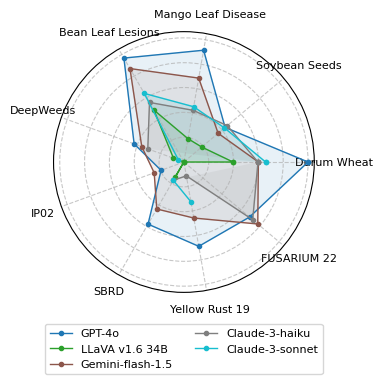

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming result_table is already defined as per your provided data

# Prepare the data
models = result_table.index.tolist()
datasets = result_table.columns.get_level_values(3).tolist()
metrics = result_table.columns.get_level_values(1).tolist()
values = result_table.values

# Normalize the values based on the metric
normalized_values = np.zeros_like(values)
for i, metric in enumerate(metrics):
    if metric == 'F1 Score':
        normalized_values[:, i] = values[:, i] / 100
    elif metric == 'MAE':
        if np.all(np.isnan(values[:, i])):
            normalized_values[:, i] = np.nan
        else:
            column_max = np.nanmax(values[:, i])
            if column_max != 0:
                normalized_values[:, i] = 1 - (values[:, i] / column_max)
            else:
                normalized_values[:, i] = np.nan

# Remove columns with all NaN values
valid_columns = ~np.all(np.isnan(normalized_values), axis=0)
normalized_values = normalized_values[:, valid_columns]
datasets = [d for d, v in zip(datasets, valid_columns) if v]

# Set up the angles for each dataset
angles = np.linspace(0, 2*np.pi, len(datasets), endpoint=False)

# Close the plot by appending the first value to the end
normalized_values = np.concatenate((normalized_values, normalized_values[:, [0]]), axis=1)
angles = np.concatenate((angles, [angles[0]]))

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 4), subplot_kw=dict(projection='polar'))

# Color cycle for the models
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

# Plot each model
for i, model in enumerate(models):
    ax.plot(angles, normalized_values[i], 'o-', linewidth=1, color=colors[i], label=model, markersize=3)
    ax.fill(angles, normalized_values[i], alpha=0.1, color=colors[i])

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(datasets, fontsize=8)

# Remove radial labels and set grid
ax.set_yticklabels([])
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.1, top=0.9)

# Create legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=8, ncol=2)

# Adjust layout and save
plt.tight_layout()
plt.savefig('normalized_model_performance_spider_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()